# John Wales
## 118392816

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
reloaded_model = load_model("best_network.h5")

2022-02-03 13:16:06.677445: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
reloaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                             

### As seen below I have used images from the test set. My reason being is becasue I know that these images are clean due to my work in the command line

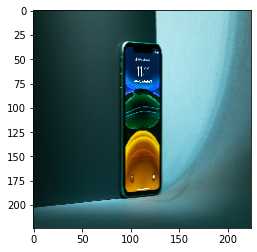

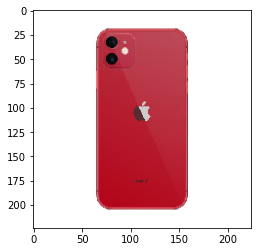

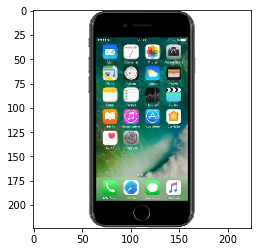

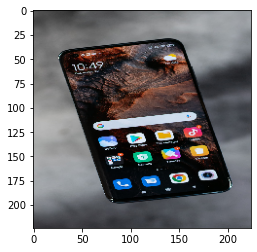

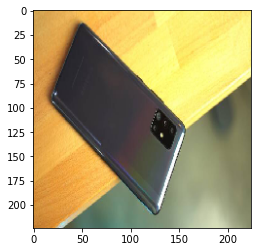

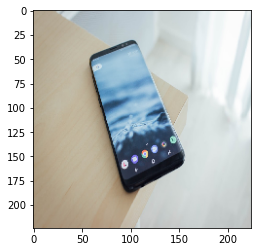

In [5]:
path = "examples"
pathnames = [os.path.join(path, filename) for filename in sorted(os.listdir(path))]

imgs = [load_img(img_path, target_size=(224, 224)) for img_path in pathnames]
for img in imgs:
    plt.figure()
    plt.imshow(img)

In [6]:
demo_dataset = image_dataset_from_directory(
    directory=path, shuffle=False, label_mode=None, image_size=(224, 224), )

Found 6 files belonging to 1 classes.


In [7]:
resnet50 = ResNet50(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [8]:
predictions = resnet50.predict(demo_dataset)
decode_predictions(predictions, top=3)

[[('n06874185', 'traffic_light', 0.70115674),
  ('n03777754', 'modem', 0.060665157),
  ('n04372370', 'switch', 0.05919032)],
 [('n03291819', 'envelope', 0.8239489),
  ('n02840245', 'binder', 0.06783396),
  ('n06359193', 'web_site', 0.040268637)],
 [('n03584254', 'iPod', 0.7714356),
  ('n02992529', 'cellular_telephone', 0.112984955),
  ('n04074963', 'remote_control', 0.09094784)],
 [('n03584254', 'iPod', 0.9074327),
  ('n04074963', 'remote_control', 0.020480342),
  ('n03642806', 'laptop', 0.015700173)],
 [('n03691459', 'loudspeaker', 0.28768834),
  ('n03584254', 'iPod', 0.2399379),
  ('n03777754', 'modem', 0.07541123)],
 [('n03666591', 'lighter', 0.7392884),
  ('n04074963', 'remote_control', 0.16224268),
  ('n03729826', 'matchstick', 0.050114837)]]

### 1 for iPhones and 0 for Android

In [9]:
reloaded_model.predict(demo_dataset)

array([[3.2897443e-02],
       [9.9788499e-01],
       [9.2163628e-01],
       [1.2614018e-01],
       [1.6457308e-05],
       [6.4531264e-06]], dtype=float32)

# Why does it get things wrong?
- Firstly, even to the human eye it is quite hard to distinguish between modern day iphones and androids, even though we use them everyday. We can figure out whether it is an iphone or android due to the shape apps on the screen or even the apps itself ( iphone having safari and android generally having google chrome ). Maybe this is something that the AI does not look at, making it even harder for it to predict. Also, a lot of these images have a black screen, making it even harder to tell and I don't think that we can say that we would get it right either.
- **Intra class variation** in the android images. As we know android phones have changed drastically over the last two decades. Originally they would have had buttons followed up by a screen but now they have only a screen. Due to the difference in these images the model may find this challenging.
- **Viewpoint Variation** between both classes. The model may struggle with an image of the side of a phone or one upside-down.
- **Occlusion** between both classes. Some images of these phones are hidden in a hand and this is where the model might struggle.
- **Multiple phones in one image**. The model may take this as 1 phone instead of 2 or 3. Due to all of this **noise** it may affect accuracy.
- **Poor images**. As mentioned already, some images may have multiple phones within that image. We also have images in this dataset that have noise in the background so maybe images of just the phone with nothing else would help the model.
- Finally, the dataset may not be big enough. The model may need to learn more images in order for it to get more right.

# Why does it get things right?

- The use of **Transfer Learning** helps the models accuracy. This is taking a model that was learned when solving one problem and re-using it for solving a different but related problem. Transfer learning is great as you can train a small amount of data and still get high performance. So in this case, with the size of the dataset, it works!
- This model also uses **ResNet50**. This starts from a pre-trained model that already knows how to classify objects. ResNet50 increases accuracy enourmously.
- The use of **Data Augmentation** may help the model predict as it reduces overfitting.
- The **number of layers** that this model has makes the network **deep** which in this case increases accuracy.
- The **number of neurons** is also important. In the previous notebook I have discussed this, but to summarise, the neuron layout that I found, was the best for my model.
- **Early Stopping**. This helps the model reduce overfitting by carefully analysing val_loss. If val_loss shoots up too much, we will restore the best weights.
- **Freezing and unfreezing the weights** also helps as we can tweak them to create the best model possible.